### Helpers

In [79]:
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd
import matplotlib as plt

In [81]:
#Using the spotify client to connect
id_ = credentials.spotify_client_id
secret = credentials.my_secret
ccm = SpotifyClientCredentials(client_id=id_, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=ccm)

## Functions

In [197]:
#Use the artist and track to find a song id
def get_track_id(artist_name,track_name):
    results = sp.search("artist: " + artist_name + ", track: " + track_name)
    return results['tracks']['items'][0]['uri']

In [205]:
#testing above function
get_track_id('2pac',"hail mary")

'spotify:track:2zoobJFEB9h15fjYjRd6oP'

In [ ]:
track_objects = []
for track_id_list in track_ids:
    tracks = sp.tracks(track_id_list)
    track_objects.append(tracks)

In [ ]:
audio_feature_objects = []
for track_id_list in track_ids:
    features = sp.audio_features(track_id_list)
    audio_feature_objects.append(features)

In [ ]:
spotify_data = {
    "audio_features": audio_feature_objects,
    "tracks": track_objects
}
# path = "~/Documents/FlatironSchool/Projects/Final-Project/Documentation/test.json"
import json
with open('test.json', "w") as outfile:
    json.dump(spotify_data, outfile)

In [ ]:
#Reformatting from a dictionary to a table
df = pd.DataFrame(columns=[
    'name',
    'duration_ms',
    'popularity',
    'num_markets',
    'album',
    'disc_number',
    'is_explicit',
    'track_number',
    'release_date',
    'artist',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
])
for album_info, album_features in zip(
        spotify_data.get('tracks'), 
        spotify_data.get('audio_features')
        ):
    for track_info, track_features in zip(
        album_info.get('tracks'),
        album_features
        ):
        y = {
            'name': track_info['name'],
            'duration_ms': track_info['duration_ms'],
            'popularity': track_info['popularity'],
            'num_markets': len(track_info['available_markets']),
            'album': track_info['album']['name'],
            'disc_number': track_info['disc_number'],
            'is_explicit': track_info['explicit'],
            'track_number': track_info['track_number'],
            'release_date': track_info['album']['release_date'],
            'artist': track_info['artists'][0]['name'],
            'danceability': track_features['danceability'],
            'energy': track_features['energy'],
            'key': track_features['key'],
            'loudness': track_features['loudness'],
            'mode': track_features['mode'],
            'speechiness': track_features['speechiness'],
            'acousticness': track_features['acousticness'],
            'instrumentalness': track_features['instrumentalness'],
            'liveness': track_features['liveness'],
            'valence': track_features['valence'],
            'tempo': track_features['tempo'],
            'time_signature': track_features['time_signature'],
        }
        df = df.append(y, ignore_index=True)

## Testing

Inspired by http://jdaytn.com/posts/download-blink-182-data/

In [160]:
#Create a function to get only the ID of an artist
def get_artist_id(artist_name):
    results = sp.search("artist:"+artist_name)
    artist_id = results['tracks']['items'][0]['artists'][0]['uri']
    return artist_id.strip('spotify:artist:')

In [161]:
#testing above function
#spotify:artist:7dGJo4pcD2V6oG8kP0tJRR
eminem_id = get_artist_id('eminem')

In [162]:
print(eminem_id)

7dGJo4pcD2V6oG8kP0tJRR


In [165]:
#Create a function to get all albums IDs related to one artist
def get_albums_id(artist_id, limit=50):
#     albums_ids = []
    albums = sp.artist_albums(artist_id,country="US", limit=limit)
    album_ids = [album['uri'].strip('spotify:album:') for album in albums['items']]
    return album_ids

In [166]:
#testing above function #3HNnxK7NgLXbDoxRZxNWiR 1st value
eminem_album = get_albums_id(eminem_id)

['3HNnxK7NgLXbDoxRZxNWiR',
 '5pJBqddqlkBbGKQvljZI',
 '0U6ldwLBEMkwgfQRY4V6D2',
 '7cwcyW39NGUAiukHc1MOFD',
 '2mzSjECCtpaHI9GEt5lbkP',
 '02BQFiWcFYKb5iJIKVpP',
 '6DN7GcZF1HywzrkGN6Eeqk',
 '3vOgbDjgsZBAPwV2M3bNOj',
 '6Vn28iXHIwxmvh4Va0hSoe',
 '2NDWe8wEVGozh9VigPwQGj',
 '47BiFcV59TQi2s9SkBo2',
 '2bn6QpvG94QJkQTETzjTC',
 '7MZzYkbHL9Tk3O6WeD4Z0Z',
 '0iBl0xtWCSFHISzTmp6Wa3',
 '7h2OEj0ifXb3UdgvTmCqfY',
 '0dSi4mEwlCG6cSfWLT6rZG',
 '6HXlnhMr40FP2qBTnKXRbA',
 '1kTlYbs28MXw7hwO0NLY',
 '7tsXPtLqhab1zWeubbf6JH',
 '5c7wdEOXRV3XlJfiPj8tAq',
 '4XD1NpIqn0UjuwWvgMG9fA',
 '2cWBwpqMsDJC1ZUwz813',
 '3Oh3UZyeLdKHwTW7n1kkx4',
 '6FSYxVo82U1lXyDAKYqpv',
 '6t7956yu5zYf5A829XRiHC',
 '16pLI8HHaJqxY7BSkW0D1',
 '10nO3EJJDMm6j6d2uK3Jah',
 '0vE6mttRTBXRe9rKghyr1',
 '2VFlCEu1NPLIbWjIw1lmjJ',
 '1GHkv48TNqI8MKWJ1FwKFC',
 '0QVIPcQ7qDA1XP8UIF3MC3',
 '190igMQvocQ2c47eWXNYhk',
 '25zSh5FAL8kUh8z7ivwBH6',
 '0MUocQ7DlptfBBq2MZwQn',
 '0RejlT9bmqcXGrqMaJRos0',
 '5IkpPd87TzsNJm20l8JwSC',
 '2nFof9rxaUwMO6zOPDFG5',
 '7vEeNwRrfZzVCtS

In [167]:
albums = sp.artist_albums('7dGJo4pcD2V6oG8kP0tJRR',country="US", limit=50)
print(albums['next'])

https://api.spotify.com/v1/artists/7dGJo4pcD2V6oG8kP0tJRR/albums?offset=50&limit=50&include_groups=album,single,compilation,appears_on&market=US


In [48]:
album_ids = [album['uri'] for album in albums['items']]
print(len(album_ids))
print(album_ids[0])

50
spotify:album:3HNnxK7NgLXbDoxRZxNWiR


In [50]:
all_tracks = []
for album_id in album_ids:
    tracks = sp.album_tracks(album_id, limit=50)
    all_tracks.append(tracks)

In [51]:
for tracks, album in zip(all_tracks, albums.get('items')):
    print(
        len(tracks.get('items')),
        "\t",
        album.get('name')
    )

13 	 Kamikaze
13 	 Kamikaze
19 	 Revival
19 	 Revival
19 	 Revival
19 	 Revival
21 	 The Marshall Mathers LP2 (Deluxe)
16 	 The Marshall Mathers LP2
21 	 The Marshall Mathers LP2
16 	 The Marshall Mathers LP2
17 	 Recovery
17 	 Recovery
29 	 Relapse: Refill
27 	 Relapse: Refill
20 	 Relapse
20 	 Relapse
22 	 Relapse [Deluxe]
23 	 Encore
20 	 Encore
20 	 Encore
23 	 Encore (Deluxe Version)
20 	 The Eminem Show
20 	 The Eminem Show (Edited Version)
19 	 The Eminem Show
18 	 The Marshall Mathers LP
18 	 The Marshall Mathers LP
30 	 The Slim Shady LP (Expanded Edition)
20 	 The Slim Shady LP
20 	 The Slim Shady LP
1 	 Remember The Name (feat. Eminem & 50 Cent)
1 	 Homicide
1 	 Homicide
1 	 Venom (Music From The Motion Picture)
1 	 Venom (Music From The Motion Picture)
1 	 Killshot
1 	 Nowhere Fast (Extended Version)
1 	 Nowhere Fast (feat. Kehlani) [Extended Version]
1 	 Nowhere Fast (feat. Kehlani) [Extended Version]
1 	 Chloraseptic (feat. 2 Chainz & Phresher) [Remix]
1 	 Campaign Speech

In [52]:
track_ids = []
for tracks in all_tracks:
    album_tracks = []
    for track in tracks.get('items'):
        album_tracks.append(track.get('uri'))
    track_ids.append(album_tracks)

In [98]:
# all_tracks[0].get('items')[0].get('uri')

'spotify:track:2jt2WxXMCD4zjACthkJQVE'

In [183]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=artist%3A+eminem%2C+track%3A+The+Ringer&type=track&offset=0&limit=10',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR'},
       'href': 'https://api.spotify.com/v1/artists/7dGJo4pcD2V6oG8kP0tJRR',
       'id': '7dGJo4pcD2V6oG8kP0tJRR',
       'name': 'Eminem',
       'type': 'artist',
       'uri': 'spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'}],
     'available_markets': ['AD',
      'AE',
      'AR',
      'AT',
      'AU',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      'CA',
      'CH',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
      'ES',
      'FI',
      'FR',
      'GB',
      'GR',
      'GT',
      'HK',
      'HN',
      'HU',
      'ID',
      'IE',
      'IL',
      'IN',
      'IS',
      'IT',
     

In [193]:
results['tracks']['items'][0]['uri']

'spotify:track:2jt2WxXMCD4zjACthkJQVE'

In [ ]:
results['tracks']['items'][0]['artists'][0]['uri']

In [68]:
print(df.shape)
df.head(50)

(604, 22)


,name,duration_ms,popularity,num_markets,album,disc_number,is_explicit,track_number,release_date,artist,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,The Ringer,337941,76,79,Kamikaze,1,True,1,2018-08-31,Eminem,...,1,-9.126,1,0.2910,0.03110,0,0.1920,0.420,118.552,4
1,Greatest,226937,73,79,Kamikaze,1,True,2,2018-08-31,Eminem,...,1,-5.186,1,0.1080,0.04410,0,0.3410,0.367,80.025,4
2,Lucky You (feat. Joyner Lucas),244679,82,79,Kamikaze,1,True,3,2018-08-31,Eminem,...,10,-4.884,0,0.3060,0.06270,0,0.1270,0.575,153.068,4
3,Paul - Skit,35240,65,79,Kamikaze,1,False,4,2018-08-31,Paul Rosenberg,...,11,-13.327,1,0.9660,0.99300,0,0.3420,0.561,161.680,4
4,Normal,222477,69,79,Kamikaze,1,True,5,2018-08-31,Eminem,...,6,-6.542,1,0.3540,0.26100,0,0.0785,0.803,120.995,4
5,Em Calls Paul - Skit,49023,64,79,Kamikaze,1,True,6,2018-08-31,Eminem,...,6,-10.115,0,0.7470,0.97700,0,0.1090,0.602,104.014,4
6,Stepping Stone,309637,69,79,Kamikaze,1,True,7,2018-08-31,Eminem,...,7,-6.032,1,0.3110,0.03050,0,0.3760,0.312,179.503,4
7,Not Alike (feat. Royce Da 5'9),288086,73,79,Kamikaze,1,True,8,2018-08-31,Eminem,...,10,-3.746,1,0.3200,0.06920,0,0.3390,0.342,140.005,4
8,Kamikaze,216029,73,79,Kamikaze,1,True,9,2018-08-31,Eminem,...,2,-5.175,1,0.4840,0.11200,0,0.3290,0.642,79.982,4
9,Fall,262493,74,79,Kamikaze,1,True,10,2018-08-31,Eminem,...,1,-5.716,1,0.2950,0.22700,0,0.1120,0.535,182.973,4


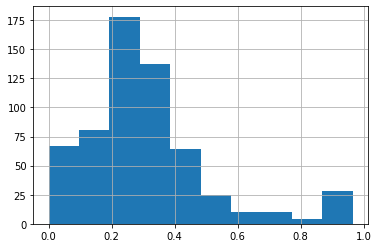

In [77]:
df.speechiness.hist()

## Collecting data

In [83]:
import pickle

with open('hip-hop-artist-ranker.pkl', 'rb') as f:
    artists_list = pickle.load(f)